## Verify no slip boundary condition

1) Load a dataframe of particle trajectories 
2) remove any particles that are not in the right region based on the pxClassifier and some filtering
    -> Lets do the simplest fitering for now: is it a particle? yes => then keep, otherwise who cares what it is? 
    -> Ideally this should be done prior to particle tracking (but obviously after particle locating) 
    -> Email Ella and Will about particle tracking with IDs 
    -> PCA on different channels to id particles based on pxClassfier results as a first step in generating IDs with existing data with the application of tracking fluorescent chunks.
    -> Synthesis of dyed rings on 2nd channel to create barcodes based on integrals of pxClassifier through ranges of particle centers. 
3) Fi the top surface of the gel and bottom surface of the sediment to a plane after any outliers are removed.
4) Plot the displacements over time just above and below the interface 
5) Plot the distribution of a quantity that should be zero if there was no slip.

In [56]:
# preamble
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import trackpy as tp
import numpy as np

import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da

In [3]:
# some metaData paths, etc
dpl_metaPath = '/Users/zsolt/Colloid_git/TractionRheoscopy/metaDataYAML/tfrGel10212018A_shearRun10292018f_metaData.yaml'
stitched_fName_frmt = 'tfrGel10212018A_shearRun10292018f_stitched_sed_t{:03}.h5'
tracked_path = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/sed_stitched_maxDisp_1.2.h5'

In [4]:
# load dataframe of trackpy output (tracked)

tracked = tp.PandasHDFStoreBig(tracked_path)

#tracked = pd.read_hdf(tracked_path,'1')
#tracked.head(10)

In [20]:
# get frame 0 from tracked output
# note that there is both 'particle' column and the index. 
tracked.get(0)

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",frame,particle
0,28.096930,10.316645,25.167796,0,0
1,42.484647,2.705690,27.140214,0,1
2,48.602294,3.986103,27.065810,0,2
3,38.440631,6.005403,27.159629,0,3
4,47.926670,6.344692,27.114065,0,4
...,...,...,...,...,...
1157454,220.798993,187.106958,77.657198,0,963456
1157455,228.533523,199.772788,79.314110,0,963457
1157456,220.037166,232.695633,80.811141,0,963458
1157457,225.019636,208.915991,84.858652,0,963459


In [18]:
col_list = list(tracked.get(0).keys())

## load dataframe of particle trajectories (traj array)
# loadData2Mem should be updated to include keeping tracking of the original index as a column trackedIndex
# which would make loading tracked superfluous (or loading this superfluous?)
trajArray = da.loadData2Mem(tracked_path,col_list=col_list)

In [19]:
trajArray

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)
frame particle                                                            
0     0                  28.096930           10.316645           25.167796
      1                  42.484647            2.705690           27.140214
      2                  48.602294            3.986103           27.065810
      3                  38.440631            6.005403           27.159629
      4                  47.926670            6.344692           27.114065
...                            ...                 ...                 ...
89    1591906           215.849582          215.849684           80.976939
      1591907           230.720364          217.263068           83.661271
      1591908           189.146933          225.644107           84.754404
      1591909           186.748290          226.678633           83.714706
      1591910           230.502905          208.799177           85.344078

[87000272 rows x 3 columns]

In [203]:
tmp = tracked.get(0)
tmp

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",frame,particle
0,28.096930,10.316645,25.167796,0,0
1,42.484647,2.705690,27.140214,0,1
2,48.602294,3.986103,27.065810,0,2
3,38.440631,6.005403,27.159629,0,3
4,47.926670,6.344692,27.114065,0,4
...,...,...,...,...,...
1157454,220.798993,187.106958,77.657198,0,963456
1157455,228.533523,199.772788,79.314110,0,963457
1157456,220.037166,232.695633,80.811141,0,963458
1157457,225.019636,208.915991,84.858652,0,963459


In [204]:
tmp[tmp['particle'] == 4518]

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",frame,particle
4564,43.983876,40.110255,37.152935,0,4518


In [205]:
trajArray.xs(4518, level='particle').loc[0]

x (um, imageStack)    43.983876
y (um, imageStack)    40.110255
z (um, imageStack)    37.152935
Name: 0, dtype: float64

In [210]:
# (1) select on stitched data set for a given time (here t=0)
# (2) convert 'index' to 'particle' 
# (3) and query tracked or traj array with 'particle'
# 
# For step (2) use the following pandas dataframe

particle_index = tmp['particle']

# given an index, return the particle id:
particle_index.loc[[4564, 84756]]

4564      4518
84756    73455
Name: particle, dtype: int64

In [198]:
stitched.loc[4564]

index                                   4564
z (px, hash)                       90.686231
y (px, hash)                      338.784826
x (px, hash)                      372.468483
mass                          4104188.964323
size                                3.596387
ecc                                      NaN
signal                           22345.44768
raw_mass                      4203811.280407
ep                                       0.0
n_iteration                                1
frame                                      0
cluster                                   64
cluster_size                               1
disc_size                                0.2
size_x                                   3.4
size_y                                   3.4
size_z                                   2.0
background                       4485.631387
background_std                    170.710869
signal_std                        636.716405
z_std                               0.055964
y_std     

In [24]:
# load dataframe of stitched output with pxClassifier channels (stitched)
frame = 0
mat = 'sed'
stitchedPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/locations'
stitched_fName_frmt = 'tfrGel10212018A_shearRun10292018f_stitched_{}'.format(mat)+'_t{:03}.h5'
_fName = stitchedPath + '/' + stitched_fName_frmt.format(frame)
stitched = pd.read_hdf(_fName, key='{}'.format(frame))

In [213]:
stitched_keep = stitched[stitched['keepBool'] == True]

In [222]:
# develop a criterion on stitched keep (boolean expression selecting for things that are probably not a particle.)
garbage_bool = stitched_keep['sed_Colloid_core'] < 7
stitched_keep[garbage_bool]

,index,"z (px, hash)","y (px, hash)","x (px, hash)",mass,size,ecc,signal,raw_mass,ep,...,sed_Background_shell,fluorescent_chunk_shell,nonfluorescent_chunk_shell,hashValue,material,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",totalError,keepBool
365,365,26.866173,88.163496,10.399883,8.930515e+05,3.309833,NaN,6626.429623,9.786839e+05,1.725382e-06,...,514.520002,19.90,1.30,50,sed,2.345987,11.288802,27.579926,0.038921,True
814,814,34.322909,18.569997,156.582979,3.349415e+06,4.292262,NaN,8932.867335,3.460533e+06,4.879606e-07,...,601.590003,26.62,1.00,50,sed,19.157043,3.285550,28.698436,0.036572,True
840,840,34.545146,149.749909,123.891100,1.600587e+06,3.485813,NaN,10447.672414,1.690192e+06,9.990601e-07,...,587.090002,7.51,0.69,50,sed,15.397476,18.371240,28.731772,0.024543,True
852,852,33.566569,213.743342,143.538374,1.763944e+06,3.209305,NaN,14558.135502,1.841985e+06,9.167304e-07,...,638.310004,13.66,1.05,50,sed,17.656913,25.730484,28.584985,0.017827,True
1635,1635,44.774839,377.533590,233.587890,4.974566e+05,2.932364,NaN,5835.102050,5.519372e+05,3.059412e-06,...,582.870001,11.25,6.74,50,sed,28.012607,44.566363,30.266226,0.043344,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156933,3790,148.648707,272.514663,269.734793,1.677938e+05,2.197194,NaN,3560.314107,1.878949e+05,3.119147e-04,...,413.409999,12.34,7.28,124,sed,215.939501,216.259186,84.247306,0.070002,True
1156977,3834,152.555959,107.613920,400.006373,2.852494e+05,2.295313,NaN,5318.405773,3.097781e+05,1.891879e-04,...,377.240000,8.97,4.35,124,sed,230.920733,197.295601,84.833394,0.046041,True
1157212,176,67.550114,352.534680,193.708693,6.060212e+05,2.614562,NaN,7832.350787,6.452043e+05,5.824481e-05,...,536.430000,13.28,17.17,124,sed,207.196500,225.461488,72.082517,0.033754,True
1157406,370,145.545795,122.490757,263.657477,2.679345e+05,2.282804,NaN,5003.456668,2.920237e+05,1.286883e-04,...,397.770000,4.45,22.20,124,sed,215.240610,199.006437,83.781869,0.050228,True


In [228]:
garbage_index = stitched_keep[garbage_bool].index
garbage_particle = particle_index.loc[garbage_idx].values
garbage_particle

array([   360,    801,    827, ..., 963225, 963412, 963437])

In [232]:
# this is annoyingly slow...I think I fixed essentially this problem by switching to a different array format (maybe stack, unstack, etc)
garbage_traj = trajArray.loc[(slice(None),garbage_particle), :]

In [233]:
garbage_traj

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)
frame particle                                                            
0     360                 2.345987           11.288802           27.579926
      801                19.157043            3.285550           28.698436
      827                15.397476           18.371240           28.731772
      839                17.656913           25.730484           28.584985
      1614               28.012607           44.566363           30.266226
...                            ...                 ...                 ...
89    959535            219.324152          232.268239           83.960825
      961380            203.771094          190.877781           74.218204
      962399            220.572376          223.193657           79.736067
      962811            197.644559          207.819415           82.502508
      963412            215.323209          198.685197           83.192427

[87792 rows x 3 columns]

In [28]:
# example calculation of finding the trajectory with the largest avg nonfluorescent chunk signal
stitched[stitched['keepBool'] == True]['fluorescent_chunk_core'].describe()

count    963461.000000
mean          1.351166
std           1.668450
min           0.000000
25%           0.480000
50%           0.930000
75%           1.750000
max          88.950000
Name: fluorescent_chunk_core, dtype: float64

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fluorescent_chunk_core', ylabel='Density'>

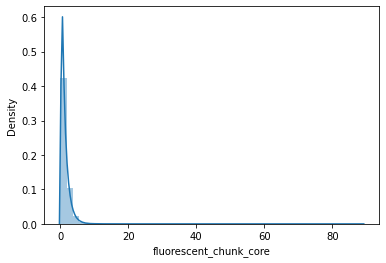

In [31]:
sns.distplot(stitched[stitched['keepBool'] == True]['fluorescent_chunk_core'])

In [32]:
stitched[(stitched['keepBool'] == True) & (stitched['fluorescent_chunk_core'] > 10)]

,index,"z (px, hash)","y (px, hash)","x (px, hash)",mass,size,ecc,signal,raw_mass,ep,...,sed_Background_shell,fluorescent_chunk_shell,nonfluorescent_chunk_shell,hashValue,material,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",totalError,keepBool
418,418,28.334306,212.553871,25.463737,7.678628e+06,4.320889,NaN,14922.979342,7.803557e+06,2.163889e-07,...,576.510003,20.11,1.15,50,sed,4.078330,25.593695,27.800146,0.018220,True
601,601,28.472736,349.780679,225.205290,6.981398e+06,3.934652,NaN,21680.880575,7.102810e+06,2.377374e-07,...,380.389999,65.40,16.44,50,sed,27.048608,41.374778,27.820910,0.013260,True
610,610,28.481205,375.223271,204.328156,6.004350e+06,3.874261,NaN,21120.424988,6.118874e+06,2.759664e-07,...,289.630000,109.15,100.99,50,sed,24.647738,44.300676,27.822181,0.013379,True
685,685,28.442586,383.545464,226.505499,8.571851e+06,4.219611,NaN,24647.854047,8.692217e+06,1.942661e-07,...,351.499999,50.82,195.03,50,sed,27.198132,45.257728,27.816388,0.011954,True
973,973,35.268097,207.114508,363.152046,6.157744e+06,4.566107,NaN,11520.963502,6.276228e+06,2.690475e-07,...,621.580002,26.29,1.04,50,sed,42.912485,24.968168,28.840215,0.024771,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152194,10390,141.071136,419.928001,11.107940,6.201587e+06,3.573722,NaN,30130.535253,6.314954e+06,1.324315e-05,...,481.140000,17.46,14.28,124,sed,186.197413,233.211720,83.110670,0.008843,True
1152494,10690,145.024310,108.755359,32.601530,5.178937e+06,3.272339,NaN,34127.840297,5.275388e+06,1.585285e-05,...,391.759999,13.72,19.03,124,sed,188.669176,197.426866,83.703646,0.007661,True
1152779,10975,141.928791,240.161902,65.453991,3.861578e+06,3.730974,NaN,22631.032457,3.962100e+06,2.110749e-05,...,393.680000,61.35,21.25,124,sed,192.447209,212.538619,83.239319,0.011668,True
1156808,3665,143.583537,246.614107,32.183836,1.504789e+05,1.943142,NaN,3629.914262,1.649187e+05,3.553721e-04,...,391.999999,24.29,25.37,124,sed,188.621141,213.280622,83.487530,0.062657,True


/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fluorescent_chunk_core', ylabel='Density'>

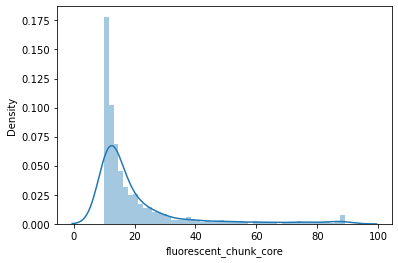

In [33]:
sns.distplot(stitched[(stitched['keepBool'] == True) & (stitched['fluorescent_chunk_core'] > 10)]['fluorescent_chunk_core'])

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fluorescent_chunk_core', ylabel='Density'>

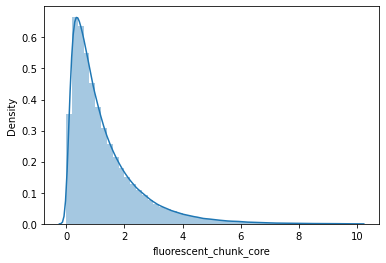

In [34]:
sns.distplot(stitched[(stitched['keepBool'] == True) & (stitched['fluorescent_chunk_core'] < 10)]['fluorescent_chunk_core'])

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sed_Background_shell', ylabel='Density'>

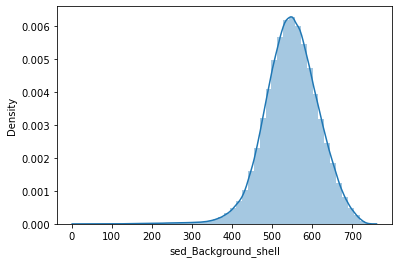

In [39]:
sns.distplot(stitched[(stitched['keepBool'] == True) & (stitched['fluorescent_chunk_core'] < 10)]['sed_Background_shell'])

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sed_Background_shell', ylabel='Density'>

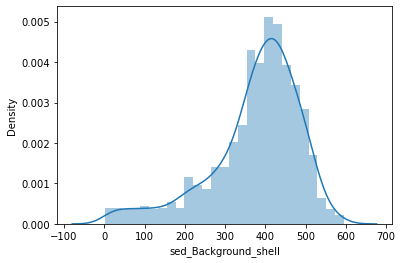

In [43]:
sns.distplot(stitched[(stitched['keepBool'] == True) & (stitched['fluorescent_chunk_shell'] > 100)]['sed_Background_shell'])

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fluorescent_chunk_shell', ylabel='Density'>

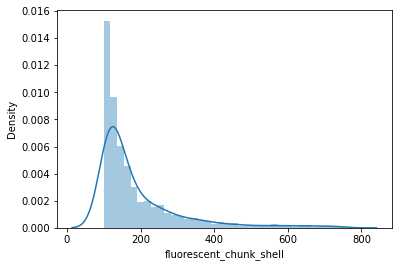

In [46]:
sns.distplot(stitched[(stitched['keepBool'] == True) & (stitched['fluorescent_chunk_shell'] > 100)]['fluorescent_chunk_shell'])

In [47]:
tmp = stitched[(stitched['keepBool'] == True)]

In [52]:
tmp['sedColloid/fluorChunk'] = tmp['fluorescent_chunk_core']/tmp['sed_Colloid_core']

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
tmp['sedColloid/fluorChunk'].replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [58]:
tmp['sedColloid/fluorChunk'].describe()

count    963459.000000
mean          0.093810
std           9.702191
min           0.000000
25%           0.023394
50%           0.047760
75%           0.089854
max        8895.000204
Name: sedColloid/fluorChunk, dtype: float64

<AxesSubplot:xlabel='sedColloid/fluorChunk', ylabel='Density'>

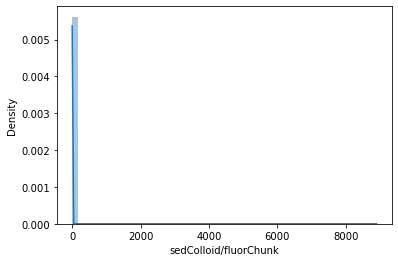

In [59]:
sns.distplot(tmp['sedColloid/fluorChunk'])

In [60]:
tmp[tmp['sedColloid/fluorChunk']> 10]

,index,"z (px, hash)","y (px, hash)","x (px, hash)",mass,size,ecc,signal,raw_mass,ep,...,fluorescent_chunk_shell,nonfluorescent_chunk_shell,hashValue,material,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",totalError,keepBool,sedColloid/fluorChunk
2837,2837,64.606209,182.769977,263.870906,1.514924e+07,4.717984,NaN,1.282247e+04,1.526887e+07,1.105912e-07,...,70.130000,5.48,50,sed,31.495154,22.168547,33.240931,0.024002,True,13.306035
4518,4518,91.675655,132.501419,399.744307,2.387380e+07,4.776583,NaN,2.325726e+04,2.399874e+07,7.036216e-08,...,160.640000,16.50,50,sed,47.120595,16.387663,37.301348,0.011756,True,10.704385
13613,344,94.769172,128.482269,400.187518,1.934010e+05,4.334375,NaN,5.931557e+03,2.063264e+05,5.281505e-04,...,169.910000,21.62,50,sed,47.171565,15.925461,37.765376,NaN,True,11.221037
28589,0,7.314788,242.847151,70.976526,1.816075e+07,5.207637,NaN,8.275992e+03,1.828261e+07,6.617580e-09,...,393.210000,5.74,52,sed,101.197300,29.077422,24.647218,0.052558,True,27.075631
30795,2206,46.337988,274.608867,145.876434,2.001443e+07,4.792049,NaN,2.701345e+04,2.013586e+07,6.008514e-09,...,207.830000,21.49,52,sed,109.810790,32.730020,30.500698,0.012451,True,14.642726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342650,6,69.673920,408.130195,304.683165,3.131149e+05,4.074728,NaN,8.101091e+03,3.322769e+05,2.553465e-04,...,307.170001,44.19,74,sed,219.958564,231.854972,34.001088,0.035043,True,18.886935
963803,5012,147.197441,268.952468,366.138940,7.839945e+04,2.372912,NaN,1.000000e-07,9.235859e+04,1.090917e-03,...,68.770000,17.31,112,sed,135.140978,123.964534,84.029616,NaN,True,11.279070
963806,5015,156.506849,17.314009,169.311490,8.370252e+04,2.341554,NaN,3.925645e+03,1.015738e+05,9.919168e-04,...,33.060000,49.08,112,sed,112.505821,95.026111,85.426027,NaN,True,12.548387
1046733,4845,154.368037,157.918400,405.994157,1.704456e+05,2.311509,NaN,6.742845e+03,1.879177e+05,1.814191e-04,...,133.550000,70.88,117,sed,139.724328,157.080616,85.105205,NaN,True,15.184616


<AxesSubplot:xlabel='fluorescent_chunk_core', ylabel='Count'>

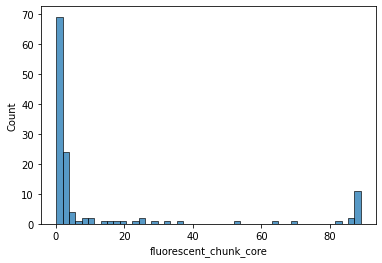

In [76]:
sns.histplot(tmp[tmp['sed_Colloid_shell'] < 7]['fluorescent_chunk_core'])

<AxesSubplot:xlabel='gel_Tracer_core', ylabel='Count'>

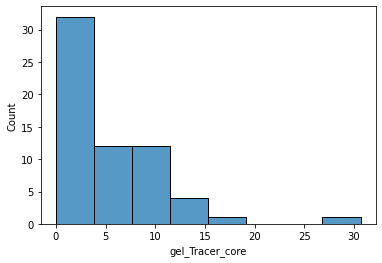

In [79]:
sns.histplot(tmp[tmp['sed_Colloid_shell'] < 5]['gel_Tracer_core'])

(array([[44., 16.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [14.,  5.,  9.,  7.,  7.,  4.,  2.,  6.,  7.,  1.],
        [27.,  8.,  7.,  5.,  9.,  2.,  2.,  0.,  1.,  1.]]),
 array([ 0.        ,  8.00500001, 16.01000003, 24.01500004, 32.02000005,
        40.02500007, 48.03000008, 56.03500009, 64.0400001 , 72.04500012,
        80.05000013]),
 <a list of 3 BarContainer objects>)

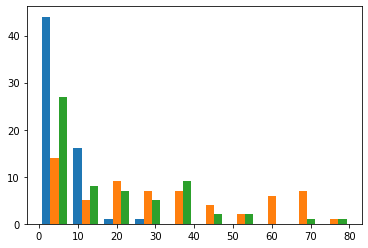

In [80]:
plt.hist(tmp[tmp['sed_Colloid_shell'] < 5][['gel_Tracer_core', 'sed_Background_core', 'gel_Background_core']])

In [81]:
tmp[tmp['sed_Colloid_shell'] < 7]

,index,"z (px, hash)","y (px, hash)","x (px, hash)",mass,size,ecc,signal,raw_mass,ep,...,fluorescent_chunk_shell,nonfluorescent_chunk_shell,hashValue,material,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",totalError,keepBool,sedColloid/fluorChunk
38174,73,28.608369,99.105235,360.827471,2.180221e+06,2.986438,NaN,18244.531178,2.243940e+06,0.000067,...,4.700000,4.57,52,sed,134.530159,12.547102,27.841255,0.013860,True,0.083333
40519,2418,95.926959,176.204034,405.518633,1.911978e+06,2.948015,NaN,17162.358635,1.968292e+06,0.000076,...,639.690002,21.79,52,sed,139.669643,21.413464,37.939044,0.015010,True,4.136170
53203,62,27.931173,13.748547,147.658278,1.579324e+06,2.967334,NaN,14777.852860,1.621127e+06,0.000081,...,232.360000,87.68,53,sed,155.900702,2.731083,27.739676,0.013981,True,0.089192
57652,11,27.319063,18.129112,153.537002,8.406543e+05,3.969025,NaN,17482.889580,8.689213e+05,0.000099,...,725.230004,3.92,53,sed,156.576755,3.234848,27.647859,16.101565,True,48.510490
57696,55,38.272988,114.712595,66.131137,1.329879e+06,2.856433,NaN,11520.942537,1.368335e+06,0.000063,...,561.920002,46.97,53,sed,146.525081,14.341948,29.290948,0.018914,True,2.559643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125926,4859,153.620979,347.265175,288.069111,5.952832e+05,3.084391,NaN,10028.208486,6.462006e+05,0.000150,...,23.140000,19.89,122,sed,126.162948,224.855495,84.993147,NaN,True,4.417355
1125953,4886,153.940930,405.883697,257.293169,2.665415e+05,3.251056,NaN,5970.521420,3.104133e+05,0.000312,...,11.550000,16.33,122,sed,122.623714,231.596625,85.041139,NaN,True,4.244565
1125987,4920,154.817931,397.030753,324.648001,1.549660e+05,3.111935,NaN,5027.135380,1.846700e+05,0.000524,...,32.750000,29.62,122,sed,130.369520,230.578537,85.172690,NaN,True,8.633333
1154632,1489,60.722494,354.160655,29.094769,1.639560e+06,2.654932,NaN,19102.167705,1.681425e+06,0.000035,...,0.130000,117.83,124,sed,188.265898,225.648475,71.058374,0.013534,True,0.119938


In [87]:
tmp.keys()

Index(['index', 'z (px, hash)', 'y (px, hash)', 'x (px, hash)', 'mass', 'size',
       'ecc', 'signal', 'raw_mass', 'ep', 'n_iteration', 'frame', 'cluster',
       'cluster_size', 'disc_size', 'size_x', 'size_y', 'size_z', 'background',
       'background_std', 'signal_std', 'z_std', 'y_std', 'x_std', 'cost',
       'gel_Background_core', 'gel_Tracer_core', 'sed_Colloid_core',
       'sed_Background_core', 'fluorescent_chunk_core',
       'nonfluorescent_chunk_core', 'gel_Background_shell', 'gel_Tracer_shell',
       'sed_Colloid_shell', 'sed_Background_shell', 'fluorescent_chunk_shell',
       'nonfluorescent_chunk_shell', 'hashValue', 'material',
       'x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)',
       'totalError', 'keepBool', 'sedColloid/fluorChunk'],
      dtype='object')

In [109]:
#tmp.keys()[4:5]
pxClassifier_keys = tmp.keys()[25:37].union(tmp.keys()[4:5])

In [129]:
searchfor = ['_core', 'mass', 'imageStack']
s = tmp.keys()
pxClassifier_keys = s[s.str.contains('|'.join(searchfor))]

In [136]:
tmp[tmp['sed_Colloid_core'] < 5][pxClassifier_keys].sort_values(by=['fluorescent_chunk_core'],ascending=False).head(50)

,mass,raw_mass,gel_Background_core,gel_Tracer_core,sed_Colloid_core,sed_Background_core,fluorescent_chunk_core,nonfluorescent_chunk_core,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)"
289205,1.829200e+07,1.839852e+07,0.00,0.03,0.01,0.01,88.950000,0.00,17.006487,221.847848,33.508343
292120,1.378613e+06,1.402523e+06,0.00,0.02,0.11,0.04,88.830000,0.00,27.079401,212.299532,33.724643
313224,1.608762e+07,1.618228e+07,0.00,0.01,0.10,0.11,88.780000,0.00,129.817068,198.408693,33.019313
292590,6.478904e+05,6.619110e+05,0.00,0.04,0.08,0.13,88.750000,0.00,25.967799,207.850551,33.772438
292095,2.242240e+05,2.388495e+05,0.00,0.09,0.05,0.11,88.750000,0.00,26.464190,212.335825,33.768362
292102,3.156110e+06,3.197532e+06,0.00,0.03,0.15,0.08,88.740000,0.00,26.387540,208.003192,33.932128
306133,2.330101e+07,2.342223e+07,0.00,0.12,0.09,0.08,88.710000,0.00,129.956336,197.905391,31.835337
58422,5.370166e+05,5.494121e+05,0.00,0.15,0.12,0.03,88.700000,0.00,141.171808,22.455980,38.475532
317252,9.645069e+05,9.937367e+05,0.01,0.02,0.24,0.04,88.690000,0.00,129.108202,198.252042,32.771579
317289,4.712120e+05,4.872239e+05,0.00,0.19,0.00,0.29,88.520000,0.00,129.578896,197.171163,32.895296


In [138]:
tmp[tmp['sed_Colloid_core'] < 5][pxClassifier_keys].sort_values(by=['gel_Tracer_core'],ascending=False).head(50)

,mass,raw_mass,gel_Background_core,gel_Tracer_core,sed_Colloid_core,sed_Background_core,fluorescent_chunk_core,nonfluorescent_chunk_core,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)"
292079,1.115010e+06,1.169455e+06,1.58,52.95,1.75,11.85,20.86,0.01,2.565197,199.066646,32.786205
28589,1.816075e+07,1.828261e+07,0.01,52.58,1.19,2.42,32.22,0.58,101.197300,29.077422,24.647218
235470,8.541829e+06,8.638170e+06,0.00,49.98,0.84,2.63,34.80,0.75,94.361708,155.631162,26.689315
239582,2.780240e+06,2.834786e+06,0.00,41.62,1.05,1.47,44.37,0.49,94.617668,155.954926,25.591280
1125908,7.399893e+05,8.018605e+05,31.02,37.24,2.12,9.83,5.13,3.66,132.998858,218.581061,85.135399
227519,1.444902e+07,1.457231e+07,0.09,37.09,1.38,2.08,48.00,0.36,95.009371,155.039142,26.818473
240514,1.789743e+05,1.949374e+05,0.00,36.32,2.70,1.71,47.80,0.47,94.538111,156.055778,26.230082
9019,1.153880e+05,1.274224e+05,20.32,32.45,0.09,34.97,0.26,0.91,29.082704,29.617821,26.207005
1125873,1.656533e+05,1.980481e+05,35.59,25.88,1.40,9.54,9.23,7.36,136.576039,226.027680,84.843861
1125912,3.298104e+05,3.637977e+05,36.30,24.71,0.67,17.08,3.46,6.78,140.429107,220.011261,84.984089


In [139]:
tmp.keys()

Index(['index', 'z (px, hash)', 'y (px, hash)', 'x (px, hash)', 'mass', 'size',
       'ecc', 'signal', 'raw_mass', 'ep', 'n_iteration', 'frame', 'cluster',
       'cluster_size', 'disc_size', 'size_x', 'size_y', 'size_z', 'background',
       'background_std', 'signal_std', 'z_std', 'y_std', 'x_std', 'cost',
       'gel_Background_core', 'gel_Tracer_core', 'sed_Colloid_core',
       'sed_Background_core', 'fluorescent_chunk_core',
       'nonfluorescent_chunk_core', 'gel_Background_shell', 'gel_Tracer_shell',
       'sed_Colloid_shell', 'sed_Background_shell', 'fluorescent_chunk_shell',
       'nonfluorescent_chunk_shell', 'hashValue', 'material',
       'x (um, imageStack)', 'y (um, imageStack)', 'z (um, imageStack)',
       'totalError', 'keepBool', 'sedColloid/fluorChunk'],
      dtype='object')

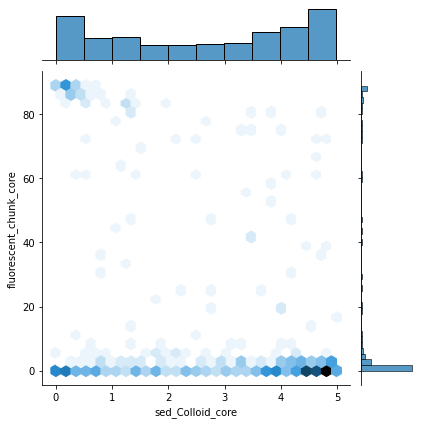

In [143]:
sns.jointplot(data=tmp[tmp['sed_Colloid_core'] < 5], y ='fluorescent_chunk_core' , x = 'sed_Colloid_core', kind='hex')

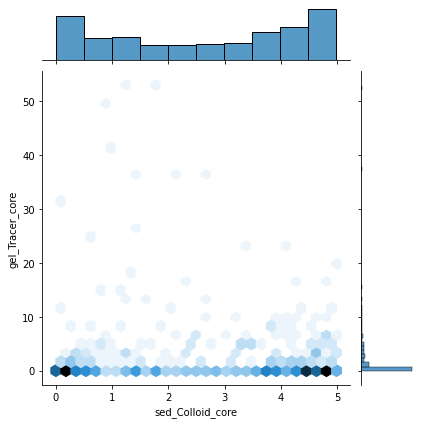

In [147]:
sns.jointplot(data=tmp[tmp['sed_Colloid_core'] < 5], y ='gel_Tracer_core' , x = 'sed_Colloid_core', kind='hex')

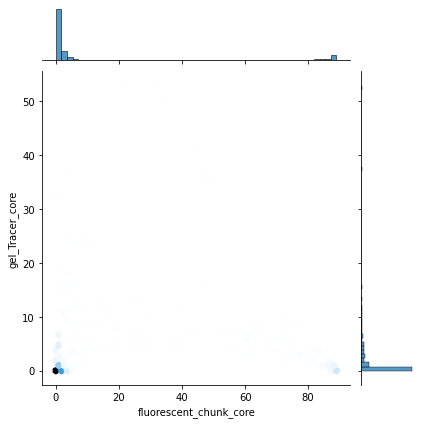

In [148]:
sns.jointplot(data=tmp[tmp['sed_Colloid_core'] < 5], y ='gel_Tracer_core' , x ='fluorescent_chunk_core', kind='hex')

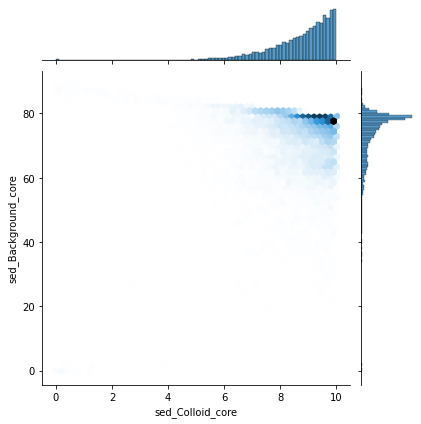

In [151]:
sns.jointplot(data=tmp[tmp['sed_Colloid_core'] < 10], y ='sed_Background_core' , x = 'sed_Colloid_core', kind='hex')

In [152]:
tmp['sed_colloid_bk_sum'] = tmp['sed_Colloid_core'] + tmp['sed_Background_core']

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


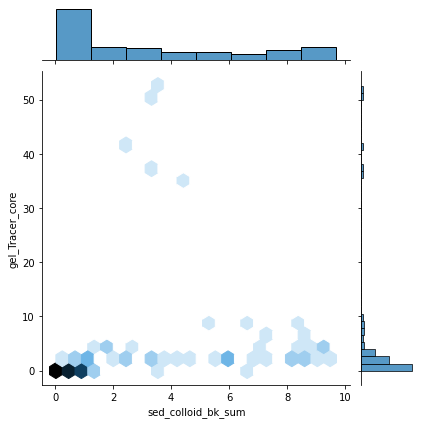

In [154]:
sns.jointplot(data=tmp[tmp['sed_colloid_bk_sum'] < 10], y ='gel_Tracer_core' , x = 'sed_colloid_bk_sum', kind='hex')

In [158]:
tmp['gel_fluor_sum'] = tmp['gel_Tracer_core'] + tmp['fluorescent_chunk_core']

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


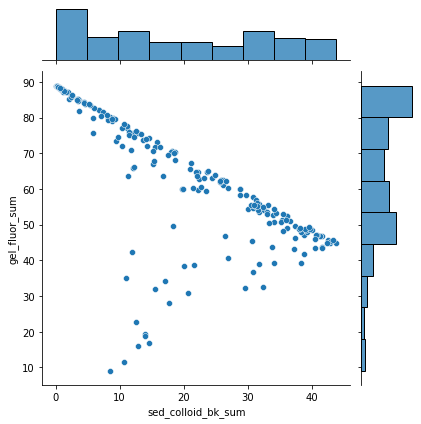

In [164]:
sns.jointplot(data=tmp[tmp['sed_colloid_bk_sum'] < tmp['gel_fluor_sum'] ], x='sed_colloid_bk_sum' , y='gel_fluor_sum')

In [180]:
tmp[tmp['sed_colloid_bk_sum'] < tmp['gel_fluor_sum']].sort_values(by=['sed_colloid_bk_sum'],ascending=True).head(50)[pxClassifier_keys]

,mass,raw_mass,gel_Background_core,gel_Tracer_core,sed_Colloid_core,sed_Background_core,fluorescent_chunk_core,nonfluorescent_chunk_core,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)"
289205,1.829200e+07,1.839852e+07,0.00,0.03,0.01,0.01,88.950000,0.00,17.006487,221.847848,33.508343
282429,3.786603e+07,3.798600e+07,0.00,1.47,0.08,0.04,87.410000,0.00,26.977702,212.251072,33.215604
58422,5.370166e+05,5.494121e+05,0.00,0.15,0.12,0.03,88.700000,0.00,141.171808,22.455980,38.475532
292120,1.378613e+06,1.402523e+06,0.00,0.02,0.11,0.04,88.830000,0.00,27.079401,212.299532,33.724643
292095,2.242240e+05,2.388495e+05,0.00,0.09,0.05,0.11,88.750000,0.00,26.464190,212.335825,33.768362
306133,2.330101e+07,2.342223e+07,0.00,0.12,0.09,0.08,88.710000,0.00,129.956336,197.905391,31.835337
53207,1.501168e+06,1.530405e+06,0.00,0.83,0.16,0.03,87.980001,0.00,157.832446,4.066755,27.658751
292590,6.478904e+05,6.619110e+05,0.00,0.04,0.08,0.13,88.750000,0.00,25.967799,207.850551,33.772438
313224,1.608762e+07,1.618228e+07,0.00,0.01,0.10,0.11,88.780000,0.00,129.817068,198.408693,33.019313
292102,3.156110e+06,3.197532e+06,0.00,0.03,0.15,0.08,88.740000,0.00,26.387540,208.003192,33.932128


In [184]:
tmp[tmp['sed_colloid_bk_sum'] < tmp['gel_fluor_sum']].sort_values(by=['mass'],ascending=True).head(50)[pxClassifier_keys]

,mass,raw_mass,gel_Background_core,gel_Tracer_core,sed_Colloid_core,sed_Background_core,fluorescent_chunk_core,nonfluorescent_chunk_core,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)"
86924,29228.363051,33306.364175,0.04,1.83,9.88,2.73,74.450000,0.07,29.083240,93.794000,40.619811
240590,33546.873468,35990.441557,0.13,0.78,18.36,24.68,44.660000,0.39,50.322846,165.132206,43.953866
292622,34456.836887,38257.888958,0.00,0.10,0.39,0.00,88.510000,0.00,26.900502,212.488842,32.479803
43453,41676.674740,45625.426680,0.37,2.30,5.23,7.01,73.330000,0.76,99.875946,43.743958,39.729730
292630,42434.528186,44689.368308,1.19,7.56,1.22,9.10,64.600000,5.33,16.614258,220.803680,31.922400
292628,47187.195343,49053.312106,0.00,3.94,1.89,0.67,82.440000,0.06,13.897932,207.695378,35.744419
292627,47526.671569,48617.610636,0.00,0.59,0.31,0.18,87.910001,0.01,17.698911,220.742338,34.461429
145446,49034.104167,53748.459779,0.00,0.43,0.40,0.31,87.860000,0.00,195.332574,77.416140,30.667831
58447,54055.679335,58386.350533,0.13,2.42,2.59,5.54,77.420001,0.90,146.912645,15.901812,30.227834
915964,57925.058287,70933.134014,41.19,11.38,0.00,14.03,7.410000,14.99,188.975312,55.949352,86.280363
